In [12]:
from causal_ccm.causal_ccm import ccm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tabulate

In [3]:
df_india_tweets = pd.read_csv('india_states_tweet_count.csv')
df_india_shortage = pd.read_csv('resources_data_used_for_india.csv')

In [4]:
df_india_tweets

,date_time,neg,neutral,pos,sum,prop_neg,prop_pos,prop_neutral,state
0,2020-02-01,296,350,11,657,0.450533,0.016743,0.532725,Haryana
1,2020-02-02,1599,1588,848,4035,0.396283,0.210161,0.393556,Haryana
2,2020-02-03,138,246,68,452,0.305310,0.150442,0.544248,Haryana
3,2020-02-04,304,54,3,361,0.842105,0.008310,0.149584,Haryana
4,2020-02-05,34,12,1,47,0.723404,0.021277,0.255319,Haryana
...,...,...,...,...,...,...,...,...,...
12458,2021-03-27,3,0,1,4,0.750000,0.250000,0.000000,Meghalaya
12459,2021-03-28,1,0,0,1,1.000000,0.000000,0.000000,Meghalaya
12460,2021-03-29,2,0,0,2,1.000000,0.000000,0.000000,Meghalaya
12461,2021-03-30,3,4,3,10,0.300000,0.300000,0.400000,Meghalaya


In [5]:
df_india_shortage

,location_id,date,version_name,location_name,inf_mean,inf_upper,inf_lower,seir_cumulative_mean,seir_cumulative_lower,seir_cumulative_upper,...,admis_upper_vax,admis_lower_vax,admis_mean_unvax,admis_upper_unvax,admis_lower_unvax,all_bed_capacity,icu_bed_capacity,infection_fatality,infection_detection,infection_hospitalization
0,1,2021-01-01,reference,Global,7171462.40,7748841.00,6504160.91,5138739.00,4187604.70,6211368.67,...,0.000047,0.000005,94949.201640,116626.534341,80505.804654,17518594.0,536960.0,0.0040,0.0985,0.0145
1,1,2021-01-02,reference,Global,7110153.50,7706397.04,6443465.35,5165413.36,4209719.81,6242896.94,...,0.000058,0.000016,95647.686647,117544.005117,81063.672212,17518594.0,536960.0,0.0040,0.0995,0.0145
2,1,2021-01-03,reference,Global,7050964.73,7658904.81,6383773.17,5192194.27,4231918.50,6274529.92,...,0.000073,0.000022,96322.317115,118224.114780,81504.320156,17518594.0,536960.0,0.0041,0.1008,0.0145
3,1,2021-01-04,reference,Global,6980448.94,7597716.05,6314841.94,5219002.94,4254147.30,6306177.33,...,0.000078,0.000027,96837.844871,118724.871543,81890.241343,17518594.0,536960.0,0.0041,0.1014,0.0145
4,1,2021-01-05,reference,Global,6887957.60,7554235.30,6205486.35,5246285.21,4276799.00,6338358.25,...,0.000081,0.000035,97512.348885,119551.065884,82414.317725,17518594.0,536960.0,0.0042,0.1026,0.0145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289250,60392,2020-12-27,reference,Thuringia,2825.36,3250.61,2313.29,1089.55,944.72,1319.71,...,0.000000,0.000000,74.111633,74.111633,74.111633,NaN,NaN,0.0184,0.2842,0.0251
289251,60392,2020-12-28,reference,Thuringia,2831.01,3235.55,2348.37,1126.93,977.10,1365.05,...,0.000000,0.000000,73.693265,73.693265,73.693265,NaN,NaN,0.0189,0.2917,0.0262
289252,60392,2020-12-29,reference,Thuringia,2820.14,3262.11,2375.72,1164.87,1009.95,1411.06,...,0.000000,0.000000,74.478980,74.478980,74.478980,NaN,NaN,0.0185,0.2970,0.0269
289253,60392,2020-12-30,reference,Thuringia,2786.02,3238.20,2358.20,1203.18,1043.13,1457.52,...,0.000000,0.000000,75.948367,75.948367,75.948367,NaN,NaN,0.0179,0.2968,0.0275


In [6]:
india_subdivisions = open('indian_entities_list').readlines()
india_subdivisions = [s[1:-3].strip() for s in india_subdivisions]

In [7]:
india_subdivisions

['Haryana',
 'Madhya Pradesh',
 'Lakshadweep',
 'Tamil Nadu',
 'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Uttarakhand',
 'Gujarat',
 'Manipur',
 'Himachal Pradesh',
 'Punjab',
 'Karnataka',
 'Jharkhand',
 'Bihar',
 'Dadra and Nagar Haveli',
 'Arunachal Pradesh',
 'Sikkim',
 'Mizoram',
 'Chandigarh',
 'Goa',
 'Assam',
 'Kerala',
 'West Bengal',
 'Maharashtra',
 'Tripura',
 'Daman and Diu',
 'Delhi',
 'Puducherry',
 'Uttar Pradesh',
 'Rajasthan',
 'Nagaland',
 'Jammu and Kashmir',
 'Odisha',
 'Telangana',
 'Chhattisgarh',
 'Meghala']

In [14]:
def get_state_dataseries_merged(df_tweets, df_resources, state_name, start_date, end_date):
    # take the data from one state and within time range
    df_tweets_selected    = df_tweets.loc[
        (df_tweets['state'] == state_name) &
        (df_tweets['date_time'] >= start_date) &
        (df_tweets['date_time'] < end_date)
    ].sort_values('date_time')
    df_resources_selected = df_resources.loc[
        (df_resources['location_name'] == state_name) &
        (df_resources['date'] >= start_date) &
        (df_resources['date'] < end_date)
    ].sort_values('date')
    
    if len(df_tweets_selected) == 0 or len(df_resources_selected) == 0:
        return None
    
    # merge the two tables
    df_merged = pd.merge(df_tweets_selected, df_resources_selected, 
                         left_on='date_time', right_on='date',
                         how='inner').drop('date_time', axis=1).sort_values('date')
    
    return df_merged

In [15]:
def model_series_ccm(X, Y, tau, E, L_min):
    # create origin model
    ccm0 = ccm(X, Y, tau, E, len(X))
    
    L_range = range(L_min, len(X), 1) # L values to test
    
    # loop extending L from min to full length of dataset to test convergence
    Xhat_My, Yhat_Mx = [], [] # correlation list
    for L in L_range: 
        ccm_XY = ccm(X, Y, tau, E, L) # define new ccm object # Testing for X -> Y
        ccm_YX = ccm(Y, X, tau, E, L) # define new ccm object # Testing for Y -> X    
        Xhat_My.append(ccm_XY.causality()[0])
        Yhat_Mx.append(ccm_YX.causality()[0])
    
    return ccm0, Xhat_My, Yhat_Mx

In [48]:
start_date = '2020-02-01'
end_date   = '2021-04-01'

In [49]:
results_per_states = {}

# now look through each state for causation correlation
for subdivision in tqdm(india_subdivisions):
    df_merged = get_state_dataseries_merged(df_india_tweets, df_india_shortage, subdivision, start_date, end_date)
    
    if df_merged is None:
        print('no data for: ', subdivision)
        continue
    
    # extract the X and Y
    X = df_merged['neg'].to_numpy()
    Y = df_merged['icu_beds_mean'].to_numpy()
    
    res = model_series_ccm(X, Y, tau=1, E=8, L_min=40)
    
    results_per_states[subdivision] = res

 14%|████████████████▋                                                                                                       | 5/36 [00:14<01:04,  2.09s/it]

no data for:  Lakshadweep
no data for:  Tamil Nadu
no data for:  Andaman and Nicobar Islands


 28%|█████████████████████████████████                                                                                      | 10/36 [00:49<02:29,  5.77s/it]C:\Users\Kevvol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
 39%|██████████████████████████████████████████████▎                                                                        | 14/36 [01:50<03:38,  9.92s/it]

no data for:  Dadra and Nagar Haveli


 44%|████████████████████████████████████████████████████▉                                                                  | 16/36 [01:57<02:18,  6.95s/it]C:\Users\Kevvol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
 50%|███████████████████████████████████████████████████████████▌                                                           | 18/36 [02:10<02:03,  6.85s/it]

no data for:  Chandigarh


 56%|██████████████████████████████████████████████████████████████████                                                     | 20/36 [02:17<01:27,  5.47s/it]

no data for:  Assam


 69%|██████████████████████████████████████████████████████████████████████████████████▋                                    | 25/36 [02:47<01:07,  6.15s/it]

no data for:  Daman and Diu


 75%|█████████████████████████████████████████████████████████████████████████████████████████▎                             | 27/36 [02:54<00:47,  5.24s/it]

no data for:  Puducherry


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 30/36 [03:10<00:32,  5.36s/it]C:\Users\Kevvol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 31/36 [03:17<00:29,  5.83s/it]

no data for:  Jammu and Kashmir


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [03:40<00:00,  6.13s/it]

no data for:  Meghala


In [50]:
# now show the results
table_data = []
table_data.append(['subdivision name', 'cor', 'p', 'X->Y', 'Y->X'])

for subdivision in results_per_states:
    ccm0, Xhat_My, Yhat_Mx = results_per_states[subdivision]
    corr_, p = ccm0.causality()
    table_data.append([subdivision] + [float('%.3g' % n) for n in [corr_, p, Xhat_My[-1], Yhat_Mx[-1]]])

In [51]:
table = tabulate.tabulate(table_data, tablefmt='html')
table

subdivision name,cor,p,X->Y,Y->X
Haryana,0.486,1.44e-25,0.486,0.484
Madhya Pradesh,0.417,1.47e-18,0.417,0.395
Andhra Pradesh,0.258,1.37e-07,0.258,0.294
Uttarakhand,0.489,2.19e-25,0.489,0.592
Gujarat,0.669,4.21e-54,0.668,0.612
Manipur,0.511,1.36e-27,0.511,0.372
Himachal Pradesh,0.47,1.05e-23,0.47,0.3
Punjab,0.244,1.28e-12,0.244,0.226
Karnataka,0.646,1.93e-49,0.648,0.383
Jharkhand,0.517,1.45e-28,0.517,0.49


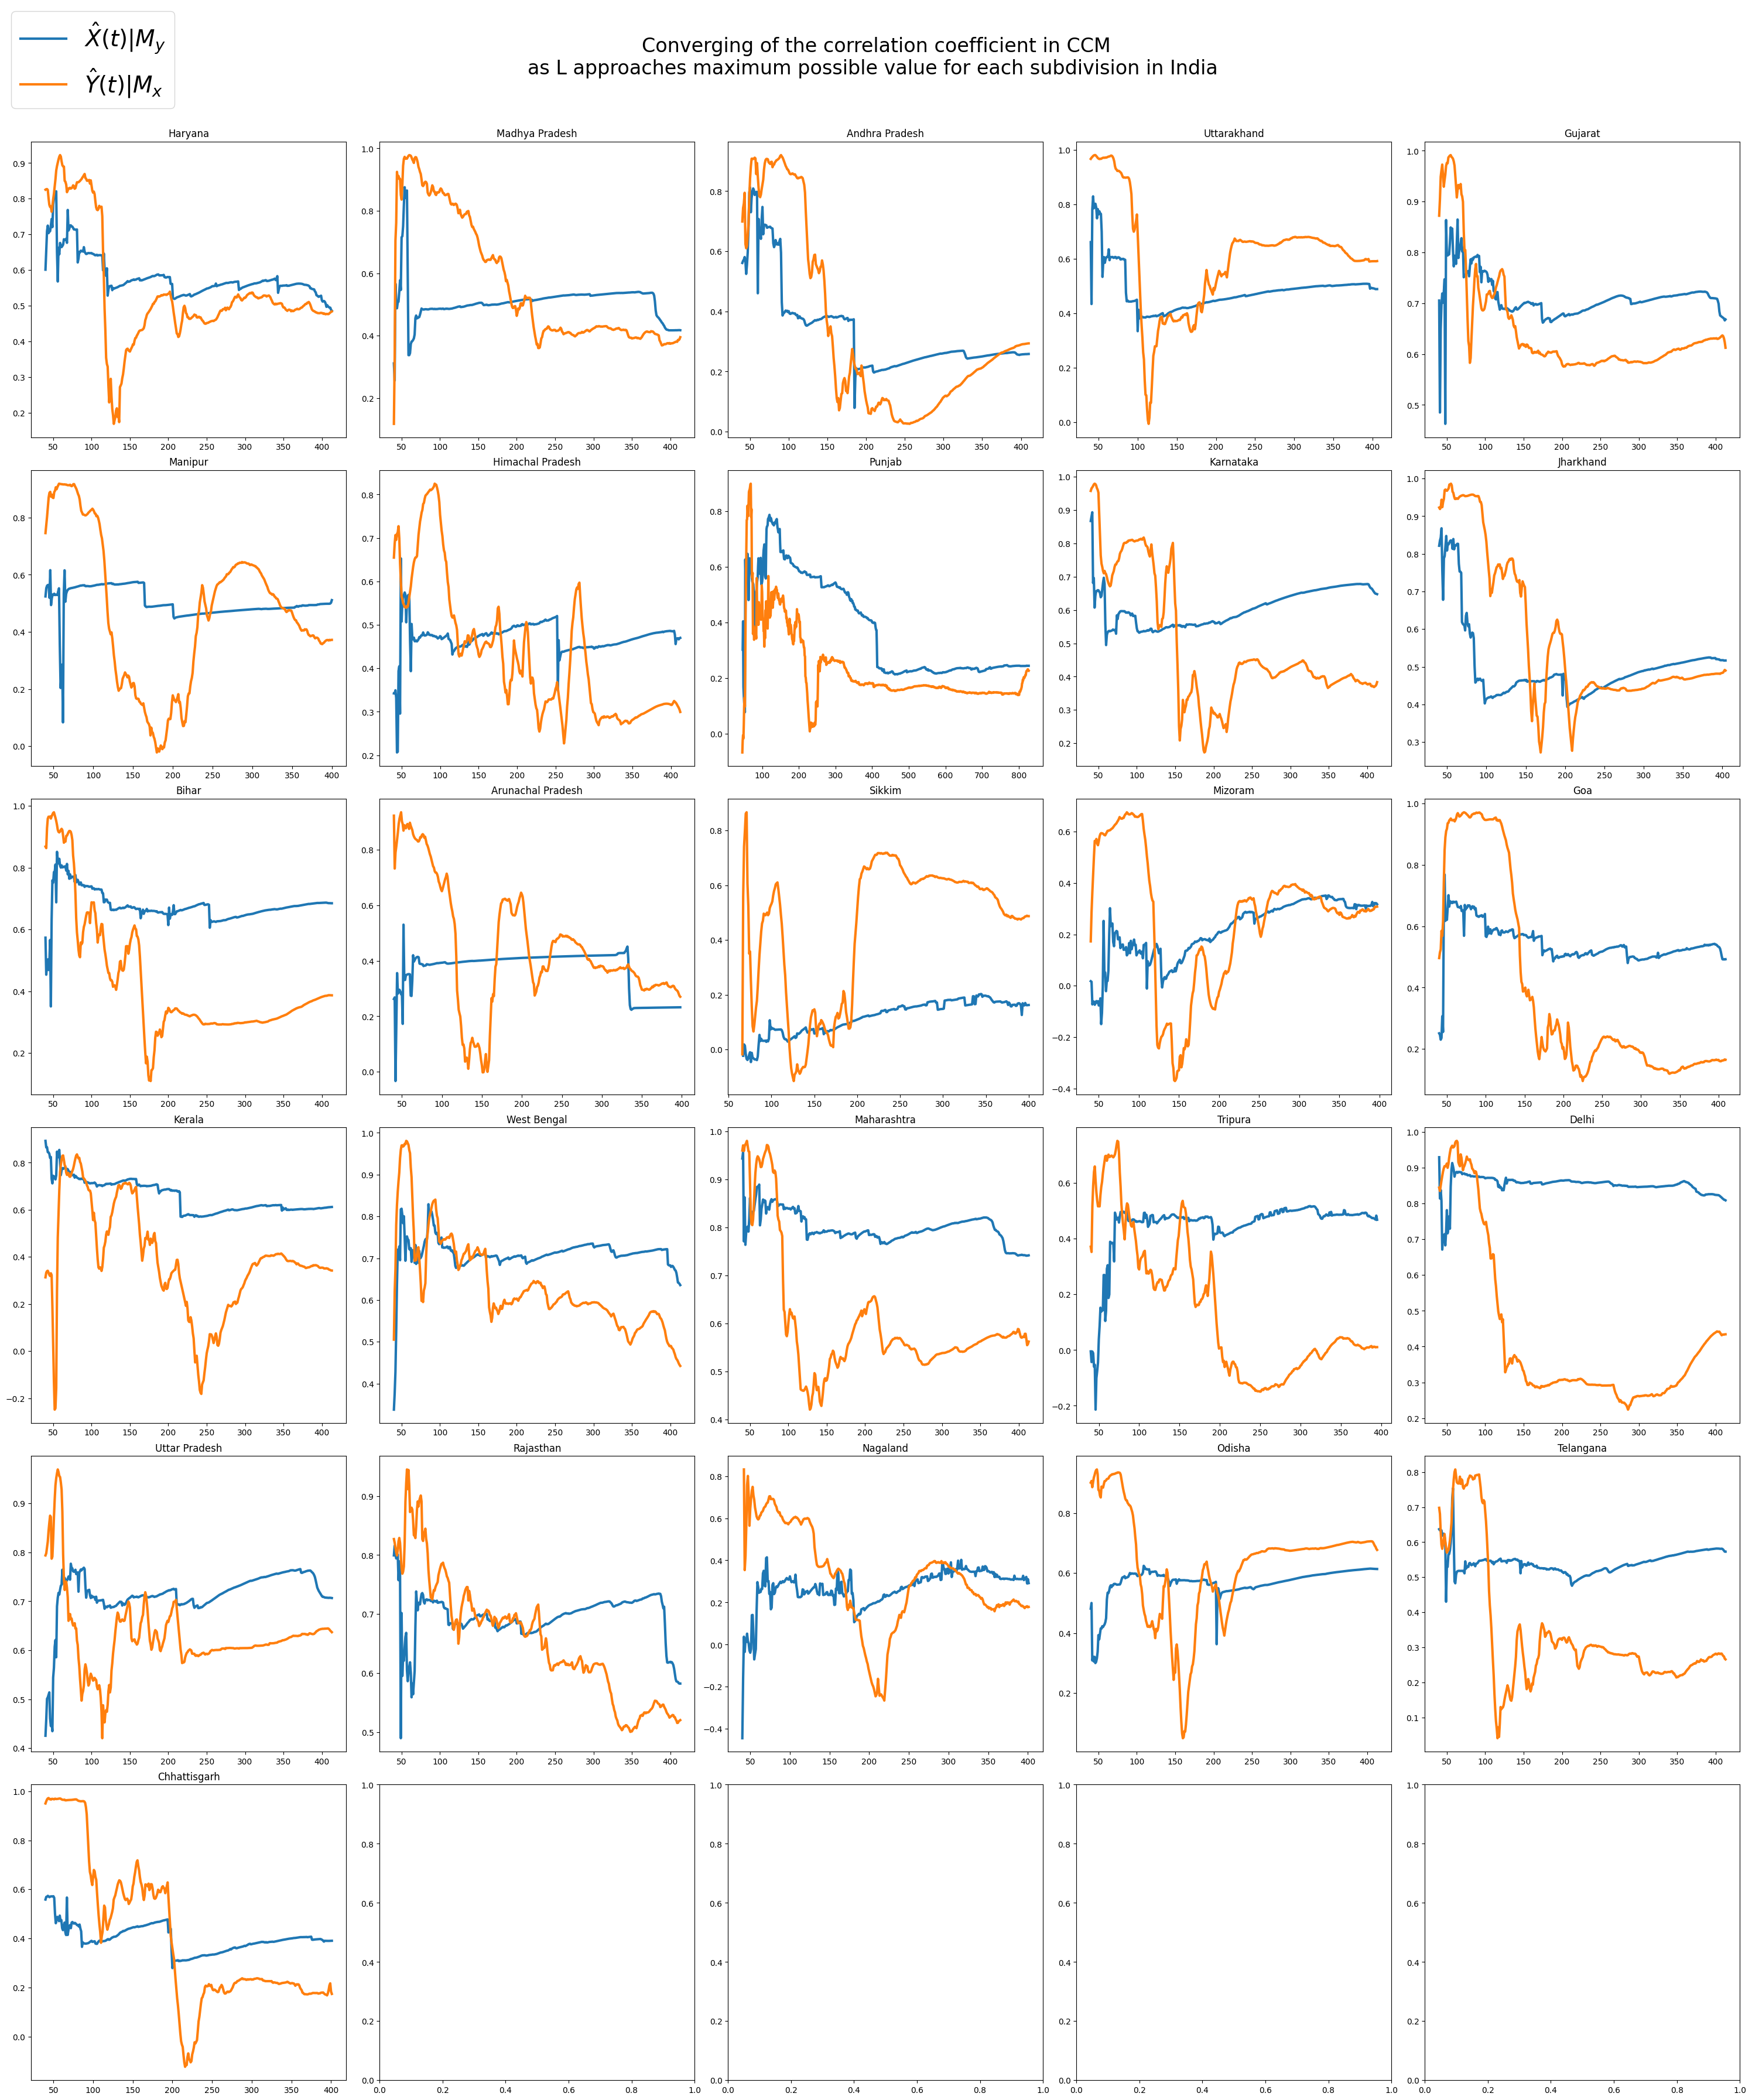

In [52]:
collage_w = 5
collage_h = 6

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(collage_h, collage_w, figsize=(30,36))

ct = 0

for subdivision in results_per_states:
    ccm0, Xhat_My, Yhat_Mx = results_per_states[subdivision]
    
    # the array of the range of L, can be different for each state
    L_range = np.arange(len(Xhat_My)) + 40
    
    p = axis[ct // collage_w, ct % collage_w]
    
    #p.figure(figsize=(5,5))
    p.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$',linewidth=3.0)
    p.plot(L_range, Yhat_Mx, label='$\hat{Y}(t)|M_x$',linewidth=3.0)
    #p.xlabel('L', size=12)
    #p.ylabel('correl', size=12)
    #p.legend(prop={'size': 12})
    p.set_title(subdivision)
    
    ct += 1

handles, labels = axis[0, 0].get_legend_handles_labels()
figure.legend(handles, labels, loc='upper left', prop={'size': 28})
#figure.legend(prop={'size': 12})

figure.tight_layout(pad=1.0)

figure.subplots_adjust(top=0.93)
figure.suptitle('Converging of the correlation coefficient in CCM\nas L approaches maximum possible value for each subdivision in India ', fontsize=24)

plt.savefig('india_collage_5.png')

In [53]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

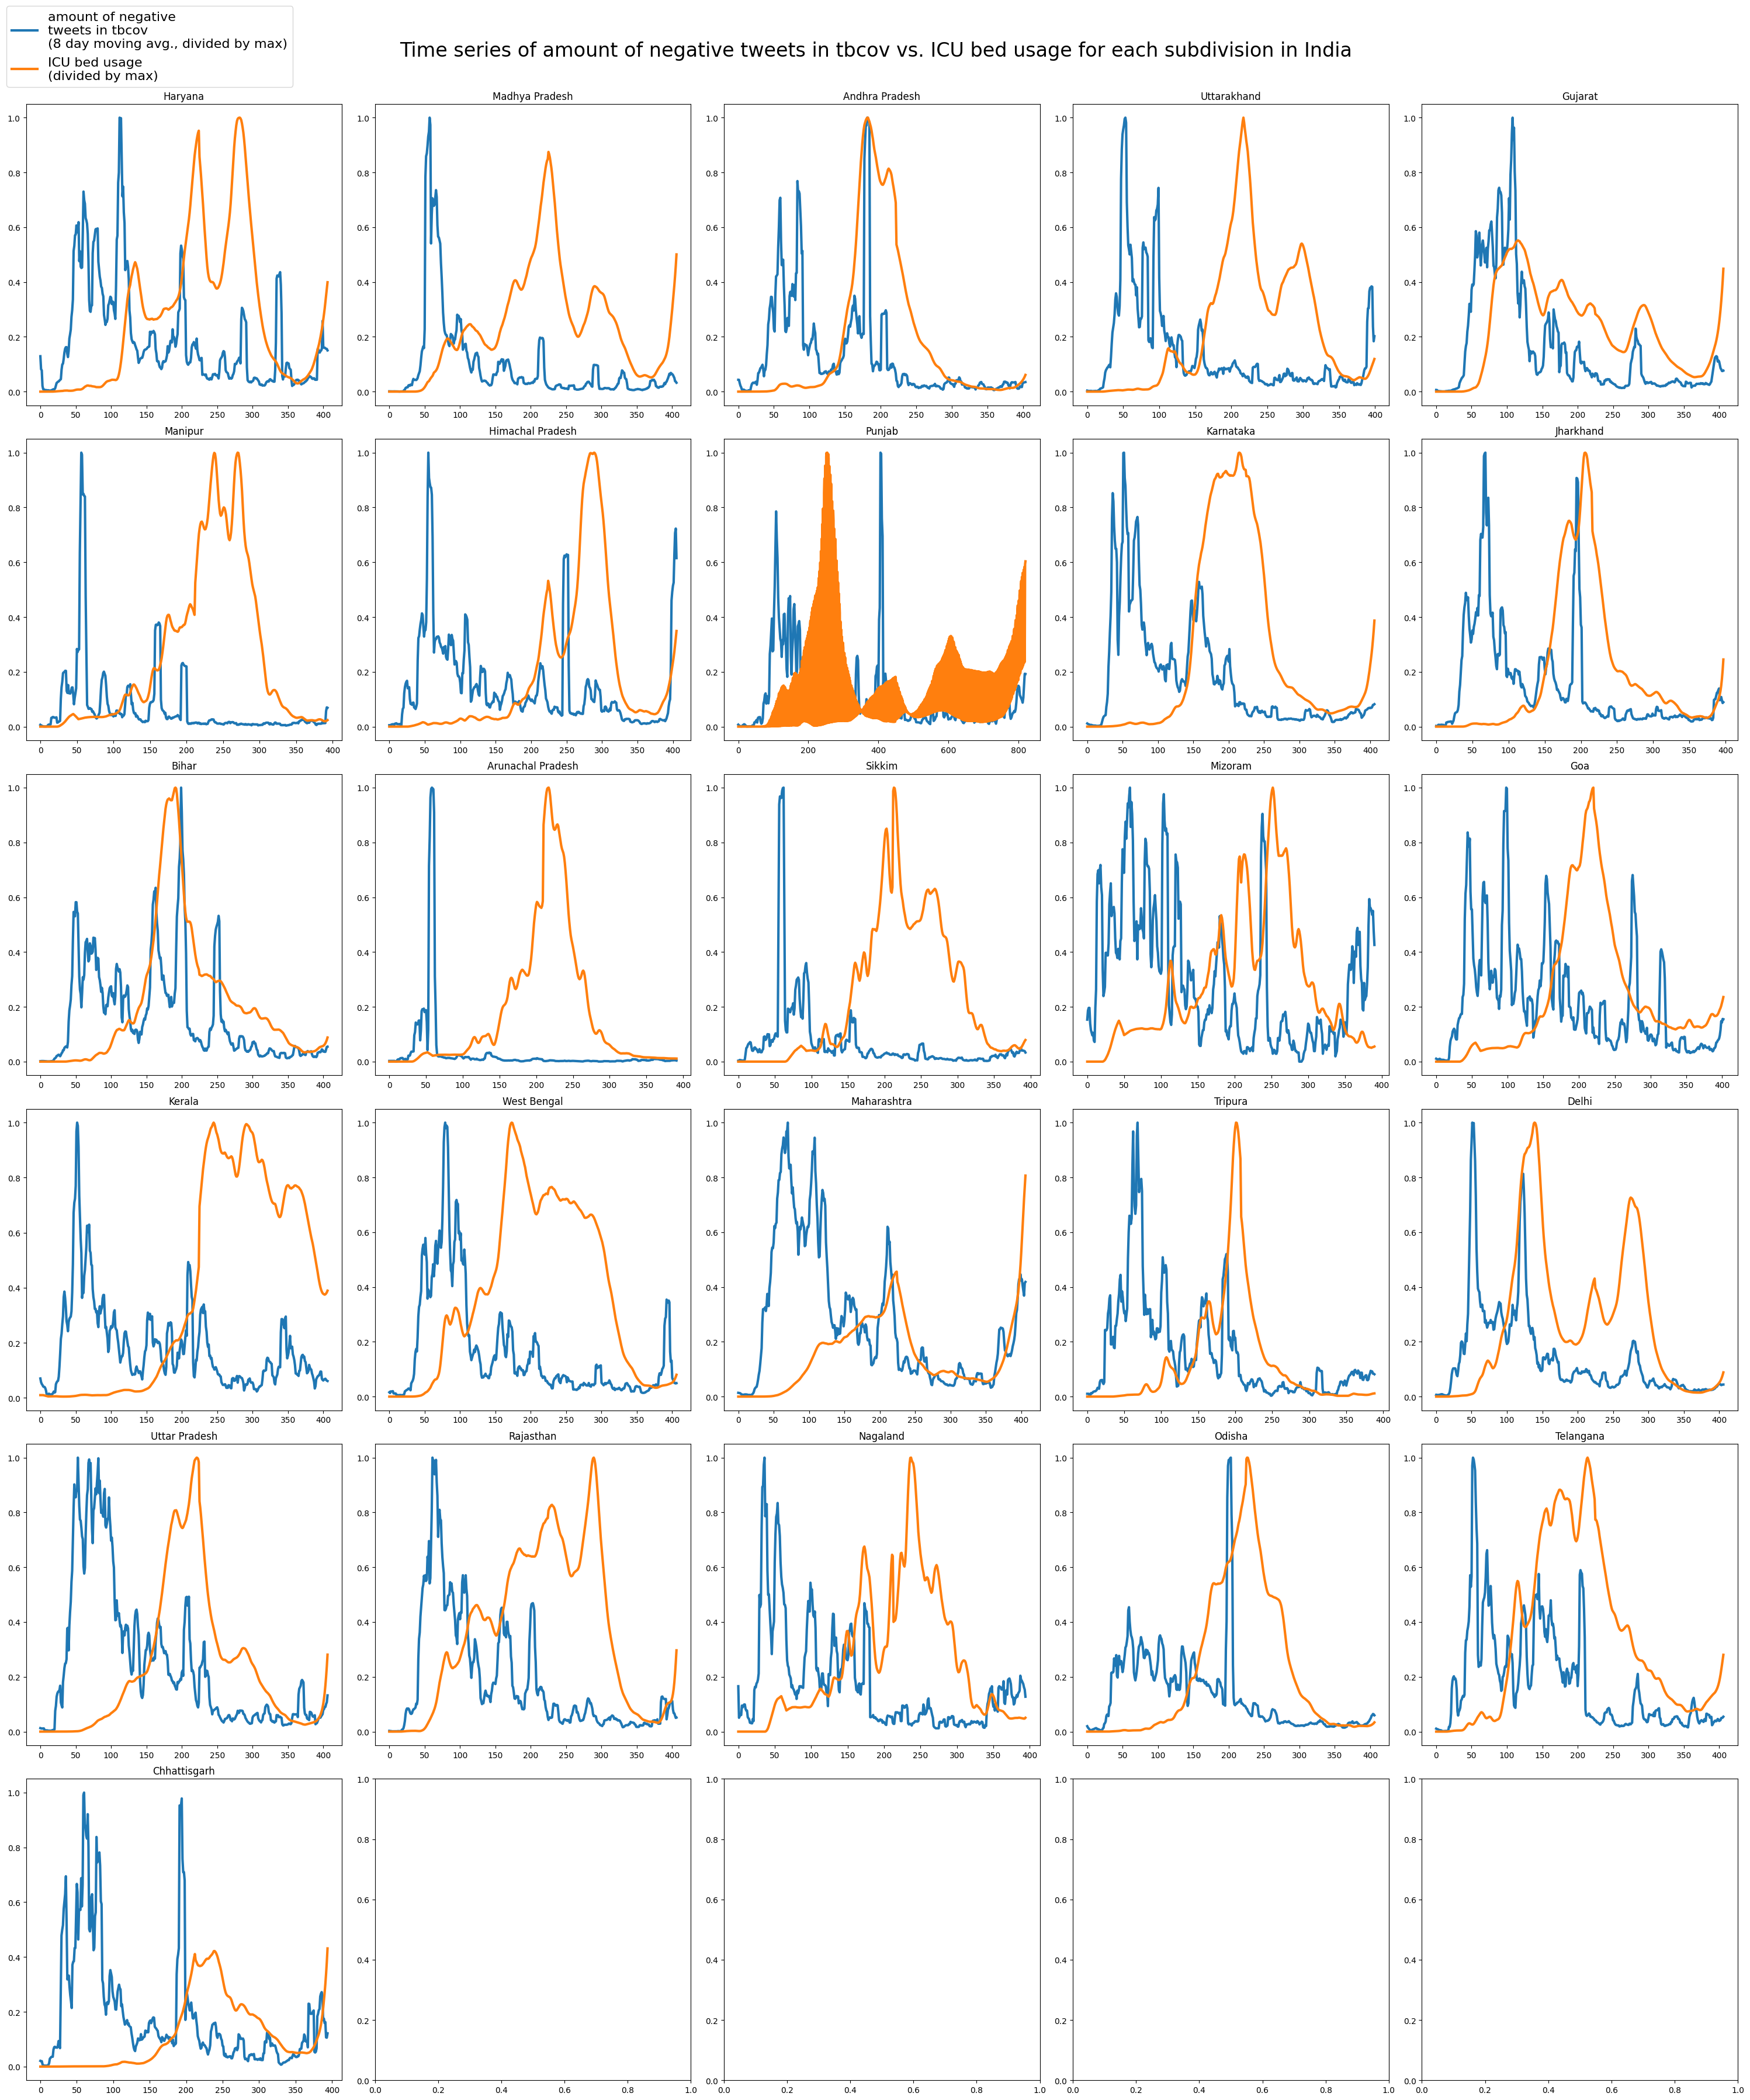

In [54]:
collage_w = 5
collage_h = 6

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(collage_h, collage_w, figsize=(30,36))

ct = 0

for subdivision in results_per_states:
    df_merged = get_state_dataseries_merged(df_india_tweets, df_india_shortage, subdivision, start_date, end_date)
    
    if df_merged is None:
        print('no data for: ', subdivision)
        continue
    
    # extract the X and Y
    X = df_merged['neg'].to_numpy()
    Y = df_merged['icu_beds_mean'].to_numpy()
    has_nan = np.isnan(Y)
    if has_nan.any():
        not_nan = np.logical_not(has_nan)
        X = X[not_nan]
        Y = Y[not_nan]
    
    X = moving_average(X, n=8)
    Y = (Y / np.amax(Y))[:len(X)]
    X = (X / np.amax(X))
    
    # the array of the range of L, can be different for each state
    day_range = np.arange(len(Y))
    
    p = axis[ct // collage_w, ct % collage_w]
    
    #p.figure(figsize=(5,5))
    p.plot(day_range, X, label='amount of negative\ntweets in tbcov\n(8 day moving avg., divided by max)',linewidth=3.0)
    p.plot(day_range, Y, label='ICU bed usage\n(divided by max)',linewidth=3.0)
    #p.xlabel('L', size=12)
    #p.ylabel('correl', size=12)
    #p.legend(prop={'size': 12})
    p.set_title(subdivision)
    
    ct += 1

handles, labels = axis[0, 0].get_legend_handles_labels()
figure.legend(handles, labels, loc='upper left', prop={'size': 16})
#figure.legend(prop={'size': 12})

figure.tight_layout(pad=1.0)

figure.subplots_adjust(top=0.95)
figure.suptitle('Time series of amount of negative tweets in tbcov vs. ICU bed usage for each subdivision in India', fontsize=24)

plt.savefig('india_collage_time_4.png')

In [30]:
# inputs
tau = 1 # time lag
E = 8 # shadow manifold embedding dimensions
L = len(X) # length of time period to consider

# if we wish to check if X causes Y
ccm1 = ccm(X, Y, tau, E, L)

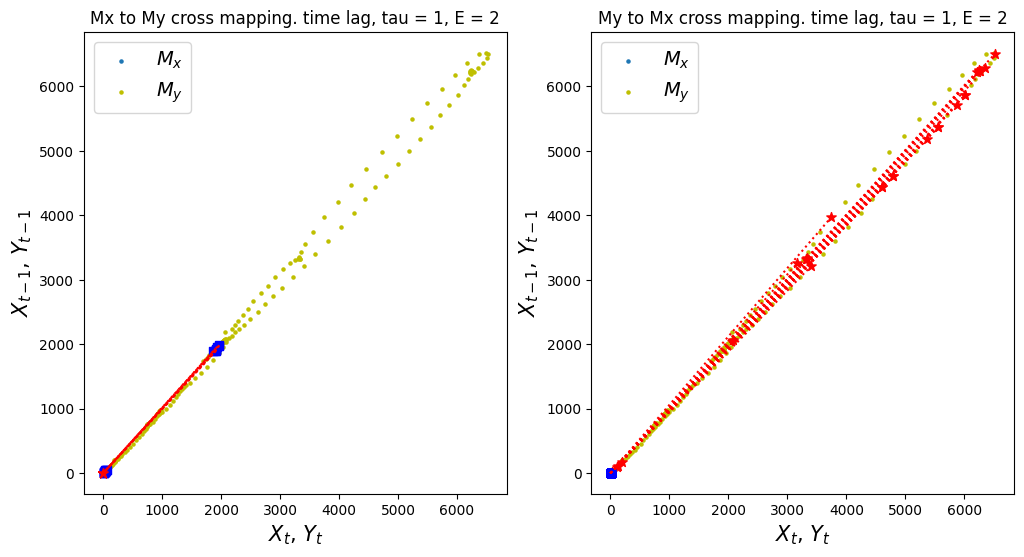

In [31]:
# visualize sample cross mapping
ccm1.visualize_cross_mapping()

In [32]:
# causality X -> Y
# returns: (correlation ("strength" of causality), p-value(significance))
corr_, p = ccm1.causality()
corr_, p

(0.46705977941775306, 7.294551011906903e-14)

In [33]:
# visualize correlation of X->Y
# stronger correlation = stronger causal relationship
ccm1.plot_ccm_correls()

IndexError: index 0 is out of bounds for axis 0 with size 0

X->Y r 0.47 p value 0.0
Y->X r 0.71 p value 0.0


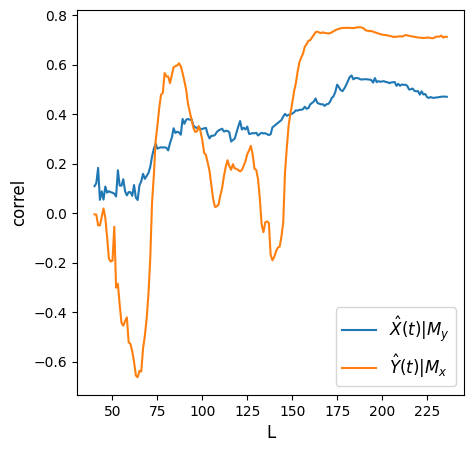

In [35]:
# checking convergence
# Looking at "convergence"
L_range = range(40, len(X), 1) # L values to test
tau = 1
E = 8

Xhat_My, Yhat_Mx = [], [] # correlation list
for L in L_range: 
    ccm_XY = ccm(X, Y, tau, E, L) # define new ccm object # Testing for X -> Y
    ccm_YX = ccm(Y, X, tau, E, L) # define new ccm object # Testing for Y -> X    
    Xhat_My.append(ccm_XY.causality()[0]) 
    Yhat_Mx.append(ccm_YX.causality()[0]) 
    
print('X->Y r', np.round(Xhat_My[-1], 2), 'p value', np.round(ccm_XY.causality()[1], 4))
print('Y->X r', np.round(Yhat_Mx[-1], 2), 'p value', np.round(ccm_YX.causality()[1], 4))    
    
# plot convergence as L->inf. Convergence is necessary to conclude causality
plt.figure(figsize=(5,5))
plt.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$')
plt.plot(L_range, Yhat_Mx, label='$\hat{Y}(t)|M_x$')
plt.xlabel('L', size=12)
plt.ylabel('correl', size=12)
plt.legend(prop={'size': 12})